In [3]:
# An autoencoder is a type of neural network designed to learn efficient, compressed representations of data. It has two main parts:

# Encoder: This part compresses the data into a smaller size, capturing essential information.
# Decoder: This part reconstructs the original data from the compressed version.


#Training: We train the autoencoder using only normal data, so it learns to recreate regular patterns well.
#Testing: When we give it new data, if it can’t recreate it accurately (meaning it makes a lot of mistakes in reconstruction), this suggests the data might be different from normal – potentially an anomaly.






import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split #Provides tools for data splitting, scaling, and evaluating model performance.
# We import necessary libraries for data handling (Pandas, Numpy), machine learning (TensorFlow)how model train and runs in neural network, visualization (Matplotlib, Seaborn), and evaluation metrics (Scikit-Learn).

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score

#RANDOM_SEED: The RANDOM_SEED is a fixed value used to ensure that the code produces the same random results each time it runs..
# TEST_PCT: Specifies the percentage of the data to be used as the test set.
# LABELS: Defines label names for easier interpretation.
RANDOM_SEED = 2021
TEST_PCT = 0.3
LABELS = ["Normal","Fraud"]

In [7]:
dataset = pd.read_csv("creditcard.csv")

In [9]:
#check for any null values .The isnull() method checks each value in the dataset for missing values (represented as NaN). The values property extracts the underlying data as a NumPy array, and any() checks if there’s at least one True (indicating a missing value) in that array.
# Output: This line will print either True or False.
# True: Indicates that there are missing values in the dataset.
# False: Indicates there are no missing values.
print("Any nulls in the dataset",dataset.isnull().values.any())
print('-------')
print("No. of unique labels",len(dataset['Class'].unique())) #dataset['Class'].unique() returns an array of unique values in the Class column, which is the target label indicating transaction type (0 for normal, 1 for fraud). len() then calculates the number of unique values.
print("Label values",dataset.Class.unique())  #This line displays the unique values directly from dataset['Class'].unique().
#Output: The exact values of the labels in the Class column, typically [0, 1].

#0 is for normal credit card transcation
#1 is for fraudulent credit card transcation

#counts occurrences of each unique value in the Class column, i.e., how many transactions are 0 (normal) and how many are 1 (fraud).
#sort=True sorts the values by count, though in this case, there are only two classes, so it doesn’t make a large difference.
print('-------')
print("Break down of Normal and Fraud Transcations")
print(pd.value_counts(dataset['Class'],sort=True))

Any nulls in the dataset True
-------
No. of unique labels 3
Label values [ 0.  1. nan]
-------
Break down of Normal and Fraud Transcations
Class
0.0    114719
1.0       242
Name: count, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_18872\3382237470.py:11: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(pd.value_counts(dataset['Class'],sort=True))


C:\Users\HP\AppData\Local\Temp\ipykernel_18872\3824744727.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(dataset['Class'],sort=True)


Text(0, 0.5, 'Number of Observations')

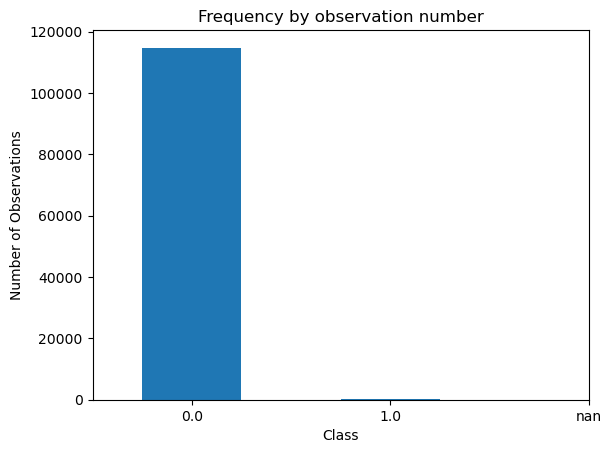

In [11]:
#visualizing the imbalanced dataset

# .plot(kind='bar') creates a bar chart.
# rot=0 sets the rotation angle of the x-axis labels to 0, making them horizontal for better readability.

count_classes = pd.value_counts(dataset['Class'],sort=True)
count_classes.plot(kind='bar',rot=0)
#range(len(dataset['Class'].unique())) generates a range of numbers equal to the number of unique classes (in this case, [0, 1]).
#dataset.Class.unique() gives the unique values in the Class column, which are 0 and 1.
#plt.xticks() sets the x-axis ticks to be 0 and 1, corresponding to the transaction classes (normal and fraud).
plt.xticks(range(len(dataset['Class'].unique())),dataset.Class.unique())
plt.title("Frequency by observation number")
plt.xlabel("Class")
plt.ylabel("Number of Observations")

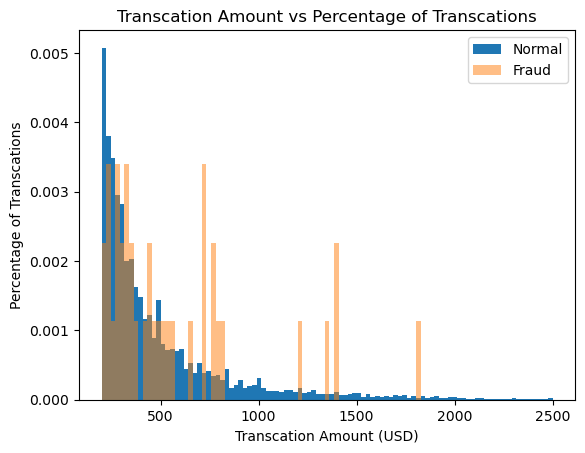

In [13]:
#Save the normal and fradulent transcations in seperate dataframe
normal_dataset = dataset[dataset.Class == 0]
fraud_dataset = dataset[dataset.Class == 1]

#Visualize transcation amounts for normal and fraudulent transcations
#bins refer to the intervals (or "buckets") that data is divided into when plotting the histogram. Each bin represents a range of values, and the height of the bin indicates how many data points fall within that range.
bins = np.linspace(200,2500,100) #generates 100 evenly spaced values between 200 and 2500. These values represent the bin edges for the histogram.
#alpha=1 sets the transparency of the histogram to fully opaque for normal transactions.and alpha=0.5 makes the fraudulent transactions histogram slightly transparent, so both histograms can be seen when they overlap.
#normalizes the histogram, so it displays the percentage (or density) of transactions rather than the absolute count, making it easier to compare distributions.
plt.hist(normal_dataset.Amount,bins=bins,alpha=1,density=True,label='Normal')
plt.hist(fraud_dataset.Amount,bins=bins,alpha=0.5,density=True,label='Fraud')
plt.legend(loc='upper right')

plt.title("Transcation Amount vs Percentage of Transcations")
plt.xlabel("Transcation Amount (USD)")
plt.ylabel("Percentage of Transcations")
plt.show()

In [15]:
dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114957,73690,-2.197480,1.982629,0.259502,0.924323,-0.879938,-0.135952,-0.380186,0.611134,0.278764,...,-0.033516,-0.367199,-0.099698,-0.111166,-0.182825,0.427261,-0.895134,0.164611,9.51,0.0
114958,73690,-2.197480,1.982629,0.259502,0.924323,-0.879938,-0.135952,-0.380186,0.611134,0.278764,...,-0.033516,-0.367199,-0.099698,-0.111166,-0.182825,0.427261,-0.895134,0.164611,9.51,0.0
114959,73690,1.255655,0.293362,0.288616,0.701727,-0.447134,-1.093442,0.029565,-0.155947,0.160172,...,-0.297287,-0.898954,0.139494,0.322281,0.187536,0.097228,-0.028586,0.029014,1.79,0.0
114960,73690,1.270638,-0.089535,-0.990690,-0.375303,0.652307,-0.073908,0.394543,-0.164288,-0.317251,...,-0.067492,-0.344301,-0.372630,-1.296908,0.731021,1.152123,-0.131651,-0.024591,75.00,0.0


In [17]:
#StandardScaler is a class that scales data so that it has a mean of 0 and a standard deviation of 1.
#How it works:
#It first calculates the mean and standard deviation of the data.
#Then, it transforms each value(original value) by subtracting the mean and dividing by the standard deviation:

sc = StandardScaler()
# Reshaping the data:

# dataset['Time'].values.reshape(-1,1) extracts the Time column from the dataset as a NumPy array and reshapes it to a 2D array with one column and multiple rows (each row representing a transaction).
# reshape(-1, 1) is necessary because fit_transform expects a 2D array, even if we only have one feature.
# The same transformation is applied to Amount.
# Standardizing Time and Amount columns:

# sc.fit_transform():
# fit: Calculates the mean and standard deviation of the column.
# transform: Applies the transformation (subtracts mean, divides by standard deviation) to each value in the column.
# After this transformation, the values in both Time and Amount columns will be standardized, meaning each will have a mean of 0 and a standard deviation of 1.

dataset['Time'] = sc.fit_transform(dataset['Time'].values.reshape(-1,1))
dataset['Amount'] = sc.fit_transform(dataset['Amount'].values.reshape(-1,1))

In [19]:
#converting dataset into raw data.(numpy array).This is useful because it makes it easier to access specific parts of the data by using array indexing.
raw_data = dataset.values
#The index -1 means the last column in the NumPy array.
labels = raw_data[:,-1]


#data is set to all columns of raw_data except the last one (0:-1 means "from the first column up to, but not including, the last column").
#This contains all the input features (like Time, Amount, and other variables representing the transaction details).
#The features describe each transaction and will be used to predict whether it is normal or fraudulent.
#The other data points are the electrocadriogram data
data = raw_data[:,0:-1]

#it is a function from sklearn that splits the training and testing sets.
train_data,test_data,train_labels,test_labels = train_test_split(data,labels,test_size = 0.2,random_state =2021)

In [21]:
min_val = tf.reduce_min(train_data) #Finds the smallest value across all elements in train_data.
max_val = tf.reduce_max(train_data) #Finds the largest value across all elements in train_data.

# it helps stabilize and speed up the training process by keeping input values within a consistent range.
# make the values of train and test data to be ranged in 0 to 1.
train_data = (train_data - min_val) / (max_val - min_val)
test_data = (test_data - min_val) / (max_val - min_val)

#TensorFlow models often work with float32 for better compatibility and computational efficiency. By casting the data to float32, you ensure that the data is in the preferred format for TensorFlow operations, reducing the need for additional conversions during training.
train_data = tf.cast(train_data,tf.float32)
test_data = tf.cast(test_data,tf.float32)

In [23]:
#astype(bool) converts these labels to boolean:
#0 becomes False, meaning a normal transaction.
#1 becomes True, meaning a fraudulent transaction.

train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)

#Creating normal and fraud datasets
#~train_labels uses the negation operator (~) to select only transactions where train_labels is False (i.e., normal transactions).
#This means that only rows with train_labels as False (normal transactions) are selected for normal_train_data.
#The same applies to test_labels for normal_test_data.
normal_train_data = train_data[~train_labels]
normal_test_data = test_data[~test_labels]

#train_labels (which are now boolean) select rows where train_labels is True (i.e., fraudulent transactions) for fraud_train_data.
#Similarly, test_labels (fraudulent transactions) are selected for fraud_test_data.
fraud_train_data = train_data[train_labels]
fraud_test_data = test_data[test_labels]


print("No. of records in Fraud Train Data=",len(fraud_train_data))
print("No. of records in Normal Train Data=",len(normal_train_data))
print("No. of records in Fraud Test Data=",len(fraud_test_data))
print("No. of records in Normal Test Data=",len(normal_test_data))

No. of records in Fraud Train Data= 188
No. of records in Normal Train Data= 91781
No. of records in Fraud Test Data= 55
No. of records in Normal Test Data= 22938


In [25]:
nb_epoch = 50 #Sets the number of times (or "epochs") the model will go through the entire training dataset.
batch_size = 64 #Defines the number of samples the model processes before updating its weights.
input_dim = normal_train_data.shape[1]
#num of columns,if the dataset has 30 features then input dim will be 30
encoding_dim = 14 #This layer (compressed layer)compresses the input data from 30 features (input layer) down to 14, capturing key patterns in a smaller representation.
hidden_dim1 = int(encoding_dim / 2) #Defines the size of the first hidden layer in the encoder, set to half the size of encoding_dim.
hidden_dim2 = 4  #This layer (4 neurons) captures the most essential features needed for reconstruction in the decoder.
learning_rate = 1e-7 # Specifies the speed at which the model updates its weights in response to the error it makes.

In [27]:
#input layer:This creates an input layer where each sample has input_dim features (the number of columns from the dataset, which was previously set as 30).
input_layer = tf.keras.layers.Input(shape=(input_dim,))

#Encoder:The encoder's job is to compress the input data into a smaller representation (called a latent space or encoding).

#1.first dense layer : Units: encoding_dim (14 neurons).
#Activation: "tanh", a type of activation function that outputs values between -1 and 1.
#Activity Regularizer: l2(learning_rate) adds a penalty to the loss function to prevent overfitting by discouraging large weights.
encoder = tf.keras.layers.Dense(encoding_dim,activation="tanh",activity_regularizer = tf.keras.regularizers.l2(learning_rate))(input_layer)

#dropout Layer: Randomly sets 20% of the encoder’s neurons to zero during training to prevent overfitting.
encoder = tf.keras.layers.Dropout(0.2)(encoder)
#Second Dense Layer: Reduces the dimensionality further. hidden_dim1 is set to 7 (half of encoding_dim). It uses the ReLU activation function to add non-linearity.
encoder = tf.keras.layers.Dense(hidden_dim1,activation='relu')(encoder)
#Third Dense Layer: Further compresses the data, reducing it to hidden_dim2 (4 neurons). It uses Leaky ReLU, which allows small negative values (unlike ReLU, which sets all negative values to zero).
encoder = tf.keras.layers.Dense(hidden_dim2,activation=tf.nn.leaky_relu)(encoder)

#Decoder: The decoder’s job is to reconstruct the original data from the compressed representation (the output of the encoder).

#First Dense Layer: Expands the encoded data back to hidden_dim1 (7 neurons). ReLU activation is used.
decoder = tf.keras.layers.Dense(hidden_dim1,activation='relu')(encoder)
#Dropout Layer: Again, 20% of the neurons are randomly turned off during training to prevent overfitting.
decoder = tf.keras.layers.Dropout(0.2)(decoder)
#Second Dense Layer: Expands the data back to encoding_dim (14 neurons). ReLU activation is used.
decoder = tf.keras.layers.Dense(encoding_dim,activation='relu')(decoder)
#Output Layer: Reconstructs the data to its original size (input_dim neurons). The tanh activation function is used because the data was normalized to a range of -1 to 1.
decoder = tf.keras.layers.Dense(input_dim,activation='tanh')(decoder)

#Autoencoder:This creates the complete autoencoder model. It connects the input layer to the decoder’s output, meaning the model takes an input, passes it through the encoder, and tries to reconstruct the original data using the decoder.
autoencoder = tf.keras.Model(inputs = input_layer,outputs = decoder)
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 30)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 14)                  │             434 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │              32 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 7)                   │              35 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 14)                  │             112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 30)                  │             450 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,168 (4.56 KB)

 Trainable params: 1,168 (4.56 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
#cp = tf.keras.callbacks.ModelCheckpoint(filepath="autoencoder_fraud.h5",mode='min',monitor='val_loss',verbose=2,save_best_only=True)


#1.mode='min' means the callback will check for the minimum value of the metric.The model with the lowest validation loss will be saved.
#2.monitor='val_loss': Specifies the metric that the callback will monitor. Here, it is monitoring the validation loss (val_loss). This is the loss on the validation set, and you want to minimize it.
#3.verbose=2:Controls the verbosity of the callback. When set to 2, it provides detailed output for each save action (like when the model gets saved after each epoch).
#4.save_best_only=True: Ensures that only the best model (i.e., the one that minimizes val_loss) is saved. If the val_loss improves, the model is saved, and if it doesn't improve, no new model is saved. This prevents overfitting by keeping only the best version of the model.
cp = tf.keras.callbacks.ModelCheckpoint(filepath="autoencoder_fraud.keras",mode='min',monitor='val_loss',verbose=2,save_best_only=True)


#Define our early stopping
early_stop = tf.keras.callbacks.EarlyStopping(
                monitor='val_loss', #The training process is watching the validation loss (how well the model is performing on the validation set) to see if it improves or not.
                min_delta=0.0001, #For the training to be considered as improving, the validation loss must improve by at least 0.0001.
                patience=10, #If the validation loss doesn't improve after 10 epochs, stop the training. This avoids running for too long when the model isn’t getting better.
                verbose=11, #it controls how much information is printed during training. 11 will show a lot of details about the stopping process (usually, 1 or 2 is more common).
                mode='min', #We're looking for the minimum value of the validation loss, meaning training will stop if the loss stops getting smaller
                restore_best_weights=True #If we stop early, the model will go back to the best weights (the ones with the lowest validation loss), so we don't end up with a model that might have overfitted later in the training process.
### In short, this callback helps stop training when there's no more improvement, making sure the model is not overfitting and is saved in its best form.


)

In [31]:
### COMPILING THE CODE : ::The optimizer controls how the model learns and updates its weights during training.Adam is a popular optimizer that adjusts the learning rate automatically, making the training process more efficient and faster.
autoencoder.compile(metrics=['accuracy'],loss= 'mean_squared_error',optimizer='adam')

In [33]:
#This line starts training the autoencoder model on normal_train_data, while also validating it on test_data. It will run for a set number of epochs, update the model in batches, and stop early if there's no improvement in validation loss. The training history is saved for later use, such as visualizing training progress.

history = autoencoder.fit(normal_train_data,normal_train_data,epochs = nb_epoch,
                         batch_size = batch_size,shuffle = True, ##batch_size=64 means the model will process 64 samples at a time before making weight adjustments and randomly shuffuled ..
                         validation_data = (test_data,test_data), ##The model will not train on this data, but it will check how well it performs on it (by calculating the loss and accuracy). This helps track if the model is overfitting.
                         verbose=1,  ##verbose=1 means it will display progress updates like the loss value and accuracy after each epoch.
                         callbacks = [cp,early_stop]).history 

Epoch 1/50
1401/1435 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: nan
Epoch 1: val_loss did not improve from inf
1435/1435 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 1.0000 - loss: nan - val_accuracy: 1.0000 - val_loss: nan
Epoch 2/50
1406/1435 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: nan
Epoch 2: val_loss did not improve from inf
1435/1435 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 1.0000 - loss: nan - val_accuracy: 1.0000 - val_loss: nan
Epoch 3/50
1434/1435 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: nan
Epoch 3: val_loss did not improve from inf
1435/1435 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 1.0000 - loss: nan - val_accuracy: 1.0000 - val_loss: nan
Epoch 4/50
1396/1435 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: nan
Epoch 4: val_loss did not improve from inf
1435/1435 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 1.0000 - loss: nan - val_accuracy: 1.0000 - val_loss: nan
Epoch 5/50
1422/1435 ━━━━━━━━━━━━━━━

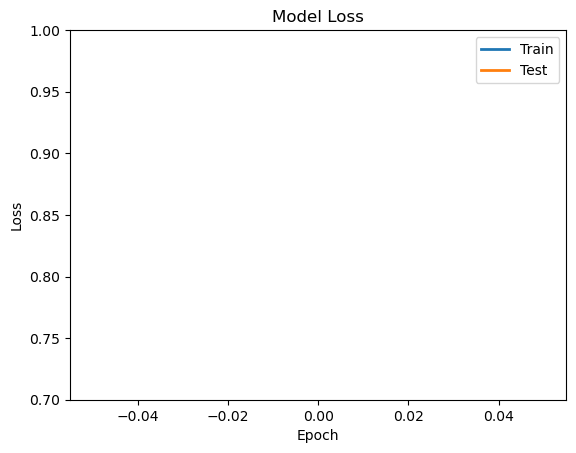

In [83]:
plt.plot(history['loss'],linewidth = 2,label = 'Train')
plt.plot(history['val_loss'],linewidth = 2,label = 'Test')
plt.legend(loc='upper right')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.ylim(ymin=0.70,ymax=1)

plt.show()

In [47]:
test_x_predictions = autoencoder.predict(test_data)  ##This uses the trained autoencoder model to make predictions on the test_data..The test_data is input to the model, and the autoencoder attempts to reconstruct it
#This calculates the difference (or error) between the original test data and the reconstructed data from the autoencoder.
mse = np.mean(np.power(test_data - test_x_predictions, 2),axis = 1) #axis=1 indicates that we want to compute the mean squared error (MSE) for each sample (across all features for each data point).


#This line creates a Pandas DataFrame named error_df to store two things:
##Reconstruction_error: The MSE values (calculated above) that represent the model's error for each test sample.
##True_class: The actual labels for each data point (whether the transaction is "Normal" or "Fraud").
error_df = pd.DataFrame({'Reconstruction_error':mse,
                         'True_class':test_labels})

719/719 ━━━━━━━━━━━━━━━━━━━━ 1s 811us/step


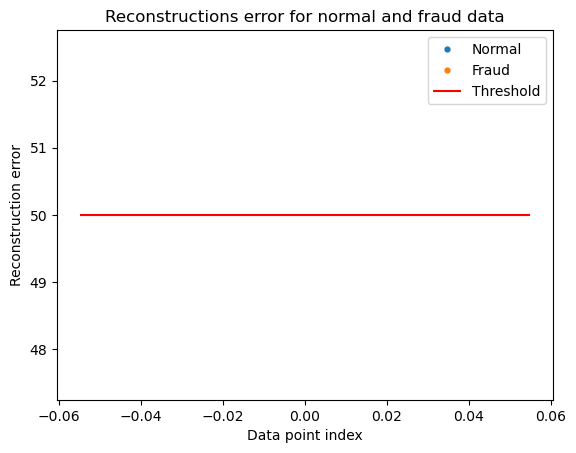

In [48]:
threshold_fixed = 50 #for reconstruction error
groups = error_df.groupby('True_class')  ##groups, is a grouped DataFrame where each group represents the data points of a specific class (normal or fraud).
fig,ax = plt.subplots() #This line creates a matplotlib plot.fig=figure object and ax is axis ....This is where we will plot the reconstruction errors.

#name will hold the class label (either 0 or 1), and group will be the DataFrame for that particular class (either normal or fraudulent).
for name,group in groups:
        ax.plot(group.index,group.Reconstruction_error,marker='o',ms = 3.5,linestyle='',
                label = "Fraud" if  name==1 else "Normal")  ##
ax.hlines(threshold_fixed,ax.get_xlim()[0],ax.get_xlim()[1],colors="r",zorder=100,label="Threshold")
ax.legend()
plt.title("Reconstructions error for normal and fraud data")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show()

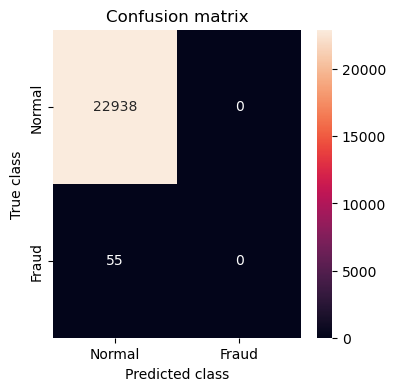

Accuracy : 0.997607967642326
Recall : 0.0
Precision : 0.0


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [51]:
### EVALUATION OF THE MODEL

threshold_fixed = 52
pred_y = [1 if e > threshold_fixed else 0 
          for e in 
        error_df.Reconstruction_error.values]

error_df['pred'] = pred_y #This line adds the predicted labels (pred_y) to the error_df DataFrame under the column pred. This allows you to compare the model's predictions with the true labels (True_class), which were originally in the dataset.


conf_matrix = confusion_matrix(error_df.True_class,pred_y)
#This code visualizes the confusion matrix as a heatmap using Seaborn's heatmap() function.
plt.figure(figsize = (4,4))
sns.heatmap(conf_matrix,xticklabels = LABELS,yticklabels = LABELS,annot = True,fmt="d")
plt.title("Confusion matrix")
plt.ylabel("True class")
plt.xlabel("Predicted class")
plt.show()

#Print Accuracy,Precision and Recall
print("Accuracy :",accuracy_score(error_df['True_class'],error_df['pred']))
print("Recall :",recall_score(error_df['True_class'],error_df['pred']))
print("Precision :",precision_score(error_df['True_class'],error_df['pred']))